<a href="https://colab.research.google.com/github/mezkymy/mock-data-analysis/blob/main/mock_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mock Data Analysis

<i>Disclaimer: This notebook was created as a sample of data analysis process using a **randomly generated mock data** made with the help of https://www.mockaroo.com/.</i>

<i>Any conclusions or insights made are not reliable and should not be taken into consideration for any purpose. What is showcased in this notebook is the process of data analysis itself.</i>

In [25]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# load data
account = 'mezkymy'
repo = 'mock-data-analysis'
branch = 'main'
data_file_name = 'MOCK_DATA.csv'

url = str(f'https://raw.githubusercontent.com/{account}/{repo}/{branch}/{data_file_name}')

raw_data = pd.read_csv(url)
df = raw_data.copy()
df.head()

,location_name,login_time,name,email,phone,yob,phone_brand,digital_interest,location_type
0,Pekanbaru,2022-01-03 01:31:59,Alwyn,ahazell0@ezinearticles.com,(432) 6299084,1959,Nokia,painting,home
1,Cirebon,2022-08-13 02:02:00,Gard,gdufoure1@hibu.com,(422) 1502852,1976,Apple,photography,office
2,Jakarta,2022-02-16 16:15:47,Earl,ejanicijevic2@ucoz.ru,(167) 2090848,1986,Huawei,blogging,public
3,Denpasar,2022-01-09 17:18:35,Ginger,ggrayston3@mozilla.org,(816) 3109658,1973,Nokia,painting,home
4,Banjarmasin,2022-03-14 18:05:05,Randi,rfanti4@sciencedirect.com,(440) 1368511,1983,LG,gaming,office


## Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location_name     1000 non-null   object
 1   login_time        1000 non-null   object
 2   name              1000 non-null   object
 3   email             1000 non-null   object
 4   phone             1000 non-null   object
 5   yob               1000 non-null   int64 
 6   phone_brand       1000 non-null   object
 7   digital_interest  1000 non-null   object
 8   location_type     1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


This is a randomly generated mock data that is also purposefully made to have zero null values in any of the columns. The amount of rows are 1000 with 8 different features/variables.

Note that some of these features may contain sensitive information and also might not be useful in the analysis itself. It is a good idea to remove these informations in the early steps to avoid leaking sensitive information further down the report.

Also since this is a randomly generated data, the email address and the name of the users might also be mismatched, thus it is completely pointless to perform any analysis using these features. Each entries are also treated as different users, so removing the name and extracting only the domain of the email is done at this step.

In [24]:
# take only the domain name from the email (also removing the TLD)
df['email_domain'] = df['email'].str.split('@').str[1].str.split('.').str[0]

# drop the original email column
df2 = df.drop(columns='email')

# remove user name
df2.drop(columns='name', inplace=True)

# check resulting data
df2.head()

,location_name,login_time,phone,yob,phone_brand,digital_interest,location_type,email_domain
0,Pekanbaru,2022-01-03 01:31:59,(432) 6299084,1959,Nokia,painting,home,ezinearticles
1,Cirebon,2022-08-13 02:02:00,(422) 1502852,1976,Apple,photography,office,hibu
2,Jakarta,2022-02-16 16:15:47,(167) 2090848,1986,Huawei,blogging,public,ucoz
3,Denpasar,2022-01-09 17:18:35,(816) 3109658,1973,Nokia,painting,home,mozilla
4,Banjarmasin,2022-03-14 18:05:05,(440) 1368511,1983,LG,gaming,office,sciencedirect


### Univariate Analysis

#### Year of Birth

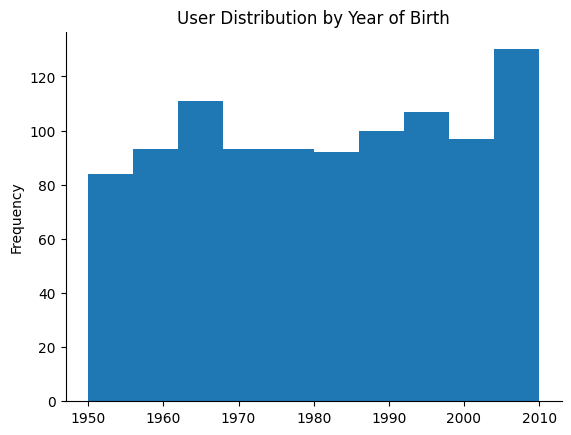

In [ ]:
# plot histogram
df2['yob'].plot(kind='hist', title='User Distribution by Year of Birth')
plt.gca().spines[['top', 'right',]].set_visible(False)

Users can be grouped based on their year of birth which indicates their age. Using the same grouping categories as used in [HIGO 2024 Annual Report](https://higo.id/annualreport2024) - which is also based on the [2020 Indonesia Population Census by BPS](https://sensus.bps.go.id/main/index/sp2020), users are grouped by these categories:

1. Pre-boomer: born before 1945
2. Boomer: born between 1946-1964
3. Gen X: born between 1965-1980
4. Millenial: born between 1981-1996
5. Gen Z: born between 1997-2012
6. Post Gen Z: born after 2013

As indicated visually on the image above, in this mock data there are no users aged below 1950 or after 2010, which means that there should be no users in the `Pre-boomer` and `Post Gen Z` category thus reducing the number of categories to 4: `Boomer`, `Gen X`, `Millenial`, and `Gen Z`.

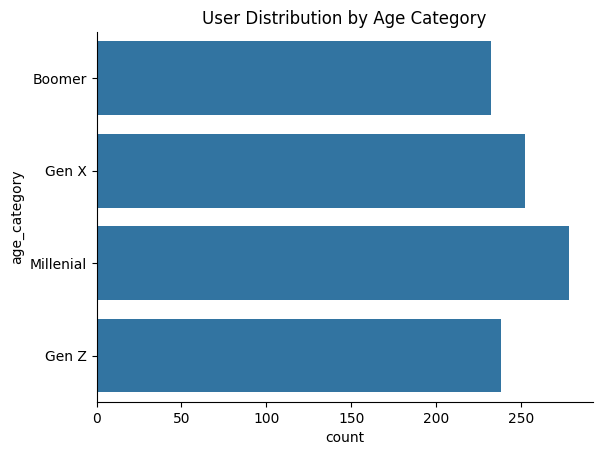

In [21]:
# categorize by yob
cond = [
    (df2['yob'] <= 1964),
    (df2['yob'] >= 1965) & (df['yob'] <= 1980),
    (df2['yob'] >= 1981) & (df['yob'] <= 1996),
    (df2['yob'] >= 1997),
]

val = ['Boomer', 'Gen X', 'Millenial', 'Gen Z']

df2['age_category'] = np.select(cond, val)

# plot to see the age category distribution
sns.countplot(y='age_category', data=df2)
plt.title('User Distribution by Age Category')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

Since there are only 4 categories, a pie chart can be used instead to easily see the proportions of each group in the overall dataset.

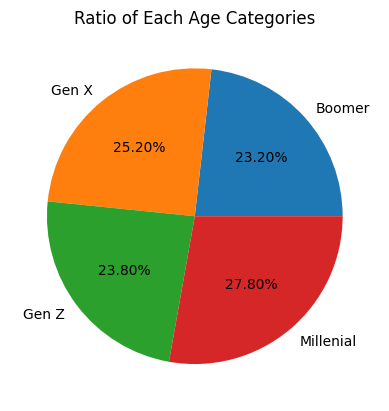

In [23]:
# pie chart
df2.groupby('age_category').size().plot(kind='pie', autopct='%.2f%%')

plt.title('Ratio of Each Age Categories')
plt.show()

In this dataset, users are relatively equally divided by their age groups, where millenials are the majority but only by a small margin compared to the others. Using this information, an **all-age approach** can be more effective rather than targeting for a specific age group when advertising or promoting a product.

#### Email Domain

In [29]:
df2.email_domain.value_counts()

google            22
t-online           8
oaic               7
dagondesign        7
cmu                7
                  ..
unblog             1
webeden            1
clickbank          1
shareasale         1
barnesandnoble     1
Name: email_domain, Length: 421, dtype: int64

There are 421 unique email domains in this dataset, which might be too much to visualize.

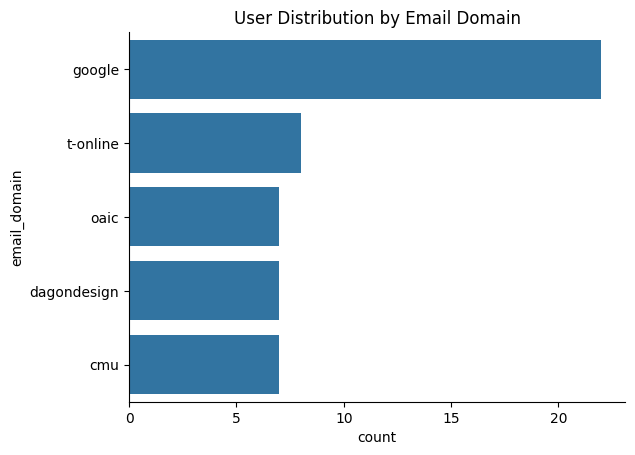

In [27]:
# plot only the top 5 email domain
sns.countplot(y='email_domain', data=df2, order=df2.email_domain.value_counts().iloc[:5].index)
plt.title('User Distribution by Email Domain')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

The most commonly used email domain by the user in this dataset is Google, which only consists of 2.2% of the dataset. This means that using the email domain to categorize users are not effective since the user email domains are so distributed and that targeting specific domains would result in excluding many other users in the process.